In [1]:
import numpy as np

In [2]:
npoints = 1200

s11 = 3
s12 = .5
mu1 = +1
xs1 = np.hstack((s11*np.random.randn(npoints,1), s12*np.random.randn(npoints,1))) + mu1 + np.random.uniform(-s11, s11, size=(npoints,2))
y1 = np.zeros((npoints,1)).astype(int)

npoints2 = 800
s21 = .5
s22 = 5
mu2 = -2
xs2 = np.hstack((s21*np.random.randn(npoints2,1), s22*np.random.randn(npoints2,1))) + mu2
y2 = np.ones((npoints2,1)).astype(int)

x_train = np.vstack((xs1[:-200,:], xs2[:-200,:]))
y_train = np.vstack((y1[:-200,:], y2[:-200,:]))
x_val = np.vstack((xs1[-200:,:], xs2[-200:,:]))
y_val = np.vstack((y1[-200:,:], y2[-200:,:]))

In [3]:
import matplotlib.pyplot as plt
      
plt.figure(figsize=(10,7))
plt.scatter(x_train[np.where(y_train==0), 0], x_train[np.where(y_train==0), 1], marker='x', color='b')
plt.scatter(x_train[np.where(y_train==1),0], x_train[np.where(y_train==1),1], marker='.', color='g')
plt.ylim(-20, 20)
plt.xlim(-20, 20)
plt.show()

<Figure size 1000x700 with 1 Axes>

In [4]:
def train_gauss_bayes(x_train, y_train):
    mu={}
    sigma={}
    prior={}
    for i in range(2):
        mu[i] = np.mean(x_train[np.where(y_train==i)[0], :], axis=0)
        sigma[i] = np.cov(x_train[np.where(y_train==i)[0], :], rowvar=False)
        prior[i] = np.where(y_train==i)[0].shape[0] / y_train.shape[0]
        
    return mu, sigma, prior

In [5]:
mus, sigmas, priors = train_gauss_bayes(x_train, y_train)

In [6]:
# np.std(x_train[np.where(y_train==1)[0], :], axis=0)

In [7]:
x = x_train[0]
x

array([1.89285868, 1.70725404])

In [8]:
def predict_gauss_bayes(x, mus, sigmas, priors):
    scores = []
    for i in range(2):
        m = mus[i]
        p = priors[i]
        si = np.linalg.inv(sigmas[i])
        s = np.exp (np.diag(np.dot( np.dot( (x - m), si), (x - m).T))) * p

        scores.append(s)

    return np.argmax(np.array(scores), axis=0).T

In [17]:
pr = 10000
x = np.vstack((np.random.uniform(-20,20, size=p r), np.random.uniform(-20,20, size=pr))).T

In [18]:
x[:10,:]

array([[  9.89893142,  11.6100606 ],
       [-10.32271696,  10.18703687],
       [-17.80204293,  -2.83431744],
       [  5.95210023,  -8.49147699],
       [ 18.78198351, -17.32693544],
       [  7.09715942,  -0.480413  ],
       [-18.13603691, -15.94340962],
       [  0.20172949, -11.06956606],
       [-15.38717486,  11.45490167],
       [-12.43950436,  17.19899904]])

In [19]:
y = predict_gauss_bayes(x, mus, sigmas, priors)

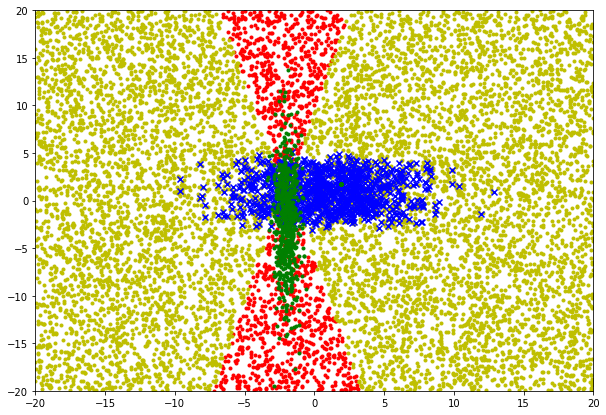

In [20]:
import matplotlib.pyplot as plt
      
plt.figure(figsize=(10,7))

plt.scatter(x[np.where(y==0), 0], x[np.where(y==0), 1], marker='.', color='r')
plt.scatter(x[np.where(y==1),0], x[np.where(y==1),1], marker='.', color='y')


plt.scatter(x_train[np.where(y_train==0), 0], x_train[np.where(y_train==0), 1], marker='x', color='b')
plt.scatter(x_train[np.where(y_train==1),0], x_train[np.where(y_train==1),1], marker='.', color='g')


plt.ylim(-20, 20)
plt.xlim(-20, 20)
plt.show()